# Table of Contents

1. [Introduction](#Introdcution)
1. a. [Configuration](#Configuration)
1. b. [Import data](#Import-data)
2. [Questions](#Questions)
3. [Question #1: The producers](#Question-#1:-The-producers)
3. a [The producers: channel info](#Channel-info)
3. b [The producers: video info](#Video-info)
3. c [The producers: recommendations info](#Recommendations-info)
3. d [The producers: topics info](#Topics-info)
4. [Question #2: The users](#2:-The-users)
4. a [Dutch commenters on international channels](#Dutch-commenters-on-international-channels)
4. b [Commenters of specific Dutch channels](#Commenters-of-specific-Dutch-channels)


## Introduction

This notebook is used for the analysis of information networks on YouTube and to make this analysis reproducable. I'll take you step by step through the data and analyses, trying to find angles for stories. You can use the Table of Contents to skip to the relevant parts.

### Configuration

First do some configuration, import libraries and set paths to data. Throughout the Notebook, Python3.6 is used. I'll import all libraries at once.

In [59]:
import pandas as pd #basically the engine for the whole analysis. 
import matplotlib.pyplot as plt #for plotting our data.
import glob #a nice library for iterating through multiple files.
import networkx as nx #we need this to construct and export network graphs.
import seaborn as sns; sns.set() #for plotting
import comment_lib #some local modules
import csv #for reading and writing csv's when we are not using the pandas library.

%matplotlib inline

In [2]:
# Set path to NL data - better to set these constants in a separate config file and import them here.

path = '/home/dim/Documents/projecten/extremisme/youtube/yt/YouTubeExtremism/DataCollection/output/NL/'

# Set path to control group data.

path_c = '/home/dim/Documents/projecten/extremisme/youtube/data/temp/bubble/right/NL/'

# Set path to international right data

path_i = '/home/dim/Documents/projecten/extremisme/youtube/data/temp/bubble/right/'

### Import data

Types of data are channels, videos, comments, recommendations and transcripts (for topics). The data are spread over multiple csv's so we have to append them first and create one dataframe for each type of data. We'll write the results to a csv file you can import later.

In [3]:
# Import videofiles into one dataframe.
parse_dates = ['video_published']
filename = 'videos_nl*.csv'

all_files = glob.glob(path + filename)
frame = pd.DataFrame()
list_ = []
for file_ in all_files:
    df = pd.read_csv(file_,index_col=None, header=0, parse_dates=parse_dates)
    list_.append(df)
videos = pd.concat(list_, sort=True)

In [4]:
videos.to_csv(path + 'all_nl_videos.csv', index=None)
del videos

In [5]:
# Import comment files into one dataframe.

parse_dates = ['comment_time']
filename = 'comments_nl*.csv'

all_files = glob.glob(path + filename)
frame = pd.DataFrame()
list_ = []
for file_ in all_files:
    df = pd.read_csv(file_,index_col=None, header=0, parse_dates=parse_dates)
    list_.append(df)
comments = pd.concat(list_, sort=True)

In [6]:
comments.to_csv(path + 'all_nl_comments.csv', index=None)
del comments

In [7]:
# Import recommendations files into one dataframe.

parse_dates = ['publishedAt']
filename = 'recommendations*.csv'

all_files = glob.glob(path + "recommendations*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in all_files:
    df = pd.read_csv(file_,index_col=None, header=0, parse_dates=parse_dates)
    list_.append(df)
recommendations = pd.concat(list_, sort=True)

In [8]:
recommendations.to_csv(path + 'all_nl_recommendations.csv', index=None)
del recommendations

In [9]:
# Import transcripts files into one dataframe.

filename = 'transcripts*.csv'

all_files = glob.glob(path + filename)
frame = pd.DataFrame()
list_ = []
for file_ in all_files:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
transcripts = pd.concat(list_, sort=True)

In [10]:
transcripts.to_csv(path + 'all_nl_transcripts.csv', index=None)
del transcripts

### Load data from control group

We want to compare the results from the NL right information network with other networks. For instance, we want to compare the behavior of certain political parties (in the Netherlands Forum voor Democratie and the PVV) with centre and left wing parties. 

TODO: make a list of relevant control channels. At least PvdD, SP, DENK, PvdA, D66, GroenLinks, ChristenUnie, VVD, CDA. Other candidates: Zondag met Lubach, De Nieuwe Maan, ???

In [ ]:
#import videos still TODO:

#import comments still TODO:

#import recommendations still TODO:

#import transcripts still TODO:

# Questions

So we're all set up. Before we dive in, what kind of questions do we want to answer? 

1. What kind of content is being watched by Dutch viewers? (The producers)
2. Who is commenting on the videos in the far right information network? How are commenters interacting? (The users)
3. How do political parties compare in terms of content, marketing strategies and reach? (Comparisson and strategies)
4. How does the far right information network compare to other information networks (like far left and center)? (Whataboutism)
5. What content is harmful, hateful, or illegal, in other words, when are lines being crossed? (Morality, the Platform)


## Question #1: The producers

For this we need:
1. Statistics on videos, channels and recommendations.
2. Topics of videos (by tags or through topic modelling)

Let's start by looking at the channels.

#### Channel info

Let's plot some channel data, like number of subscriptions and views over time. That will give us a sense of how certain channels are developing.

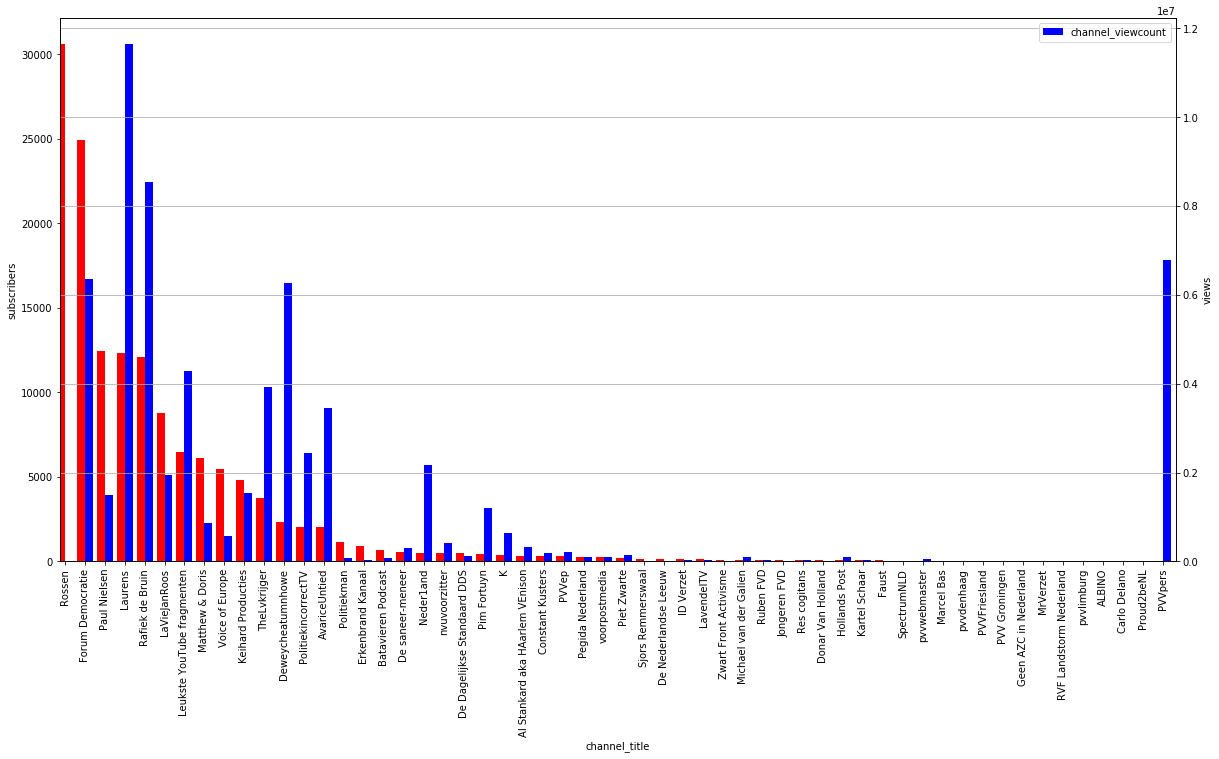

In [56]:
# Import the channel data into a dataframe.

channels = pd.read_csv(path + 'channels_nl_right.csv')

# Take a subset of the channel data.

stats = channels[['channel_title', 
                  'channel_description', 
                  'channel_subscribercount',
                  'channel_viewcount', 
                  'channel_videocount']]

stats = stats.sort_values(by='channel_subscribercount', ascending=False)
stats.set_index("channel_title",drop=True,inplace=True)

# Create matplotlib figure.

fig = plt.figure(figsize=(20,10)) 

# Create matplotlib axes.

ax = fig.add_subplot(111) 

# Create another axes that shares the same x-axis as ax.

ax2 = ax.twinx() 

# Set a width for a bar chart.

width = 0.4

# Configure the bar chart.

stats.channel_subscribercount.plot(kind='bar', color='red', ax=ax, width=width, position=1)
stats.channel_viewcount.plot(kind='bar', color='blue', ax=ax2, width=width, position=0, legend=True, grid=True)
ax.set_ylabel('subscribers')
ax2.set_ylabel('views')

plt.show()

Be careful, because there are two y-axis. The left is subscribers, the right is viewcount. 

That said though, there are some takeaways and questions:
1. PVVpers has 0 subscribers. That means that the subscribercount has not been given on the channel page. They have a lot of viewers. Still more than Forum voor Democratie, but FvD is catching up. PVV is much older.
2. Some channels generate a lot of views, like Laurens, Rafiek de Bruin, Leukste YouTube Fragmenten, Deweycheatumhowe and the LvKrijger. Most of them are very pro FvD and pro PVV.
3. FvD has relatively many subscribers (they rank 2nd), but not that many views (relitavely, they rank 4th). Did they buy subscribers? 
4. Why did Rossen remove all his videos? He was quite popular.
5. If we look at FvD more broadly and take affiliated channels into consideration, FvD is very big.

#### Video info

In [15]:
# Load videos.

videos = pd.read_csv(path + 'all_nl_videos.csv')

In [16]:
# Create a year column.

videos['video_upload_year'] = pd.DatetimeIndex(videos['video_published']).year

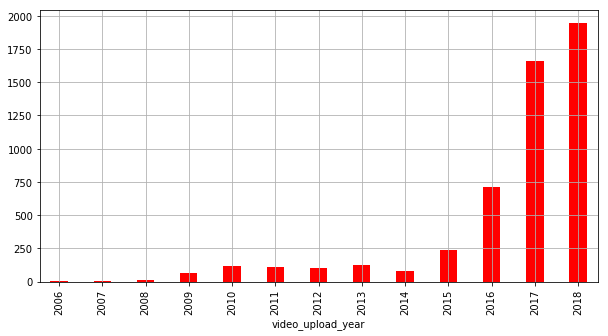

In [17]:
# Plot views and uploads per year.

uploads_per_year = videos.groupby(['video_upload_year']).size()
views_per_year = videos.groupby(['video_upload_year'])['video_view_count'].agg('sum')

fig = plt.figure(figsize=(10,5)) # Create matplotlib figure

width = 0.4

uploads_per_year.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of videos published')
ax.set_xlabel('year')

plt.show()

# First the uploads per year.

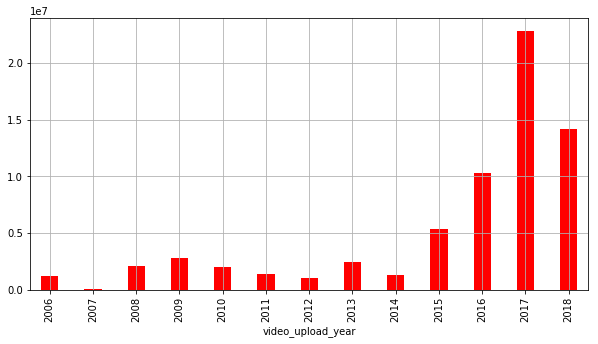

In [18]:
fig = plt.figure(figsize=(10,5))
width = 0.4

views_per_year.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of views')
ax.set_xlabel('year')

plt.show()

# Then the views per year.

Interesting:

1. In 2018 more videos were uploaded, but they've gotten significantly lesser views. It could be that older video's are still getting views. 

In [19]:
# Let's compare some channels.

channel1 = 'Forum Democratie' #fill in the channels you want to compare
channel2 = 'PVVpers'

filtered = videos.loc[(videos['video_channel_title'] == channel1) | \
                      (videos['video_channel_title'] == channel2)
                     ]

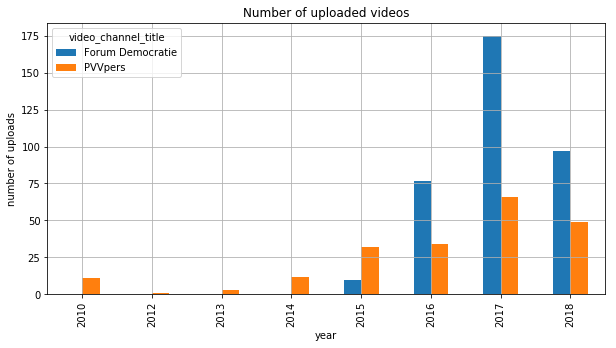

In [20]:
# First look at the number of published videos per year.

ax = filtered.groupby(['video_upload_year','video_channel_title'])['video_channel_title'] \
        .count().unstack(1).plot.bar(title="Number of uploaded videos", figsize=(10,5), grid=True)

ax.set_xlabel('year')
ax.set_ylabel('number of uploads')

plt.show()

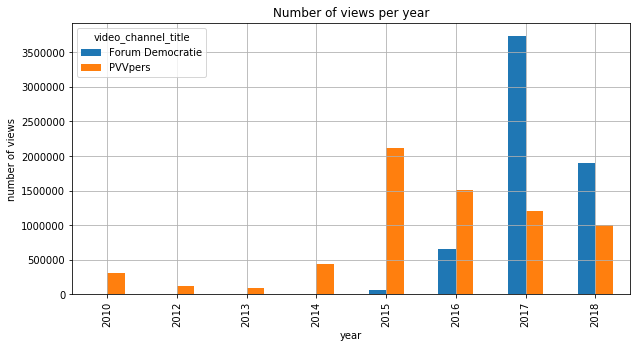

In [21]:
# Now look at the viewcount per year.

ax = filtered.groupby(['video_upload_year', 'video_channel_title'])['video_view_count'] \
        .sum().unstack(1).plot.bar(title="Number of views per year", figsize=(10,5), grid=True, legend=True)

ax.set_xlabel('year')
ax.set_ylabel('number of views')

plt.show()

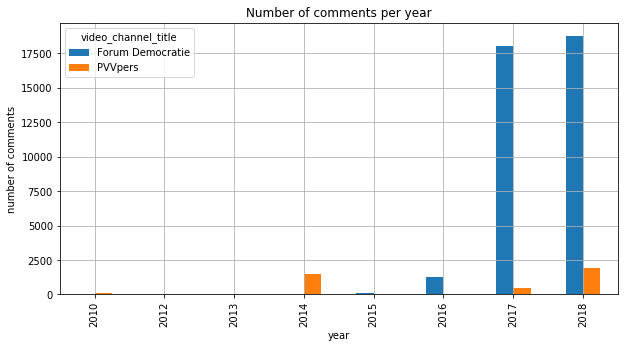

In [22]:
# And the comment count per year.

ax = filtered.groupby(['video_upload_year', 'video_channel_title'])['video_comment_count'] \
        .sum().unstack(1).plot.bar(title="Number of comments per year", figsize=(10,5), grid=True, legend=True)

ax.set_xlabel('year')
ax.set_ylabel('number of comments')

plt.show()

Some takeaways from the comparison of PVV and FvD:
1. FvD is winning on YouTube, by a large margin.
2. They are much more active in uploading content
3. That content reaches a larger audience. TODO: to be sure we need to look at the average views per video.
4. It's clear that there is much more debate, or at least more comments on FvD than on PVV.

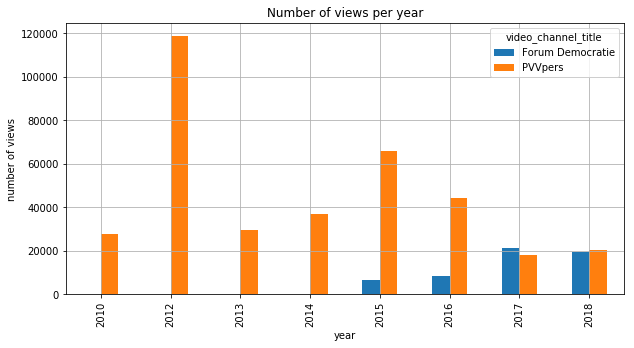

In [23]:
# Looking at the mean of viewcount per video

ax = filtered.groupby(['video_upload_year', 'video_channel_title'])['video_view_count'] \
        .mean().unstack(1).plot.bar(title="Number of views per year", figsize=(10,5), grid=True, legend=True)

ax.set_xlabel('year')
ax.set_ylabel('number of views')

plt.show()

I still want to have a good look at it, but it seems that the mean views per video is about the same. This could mean that FvD is simply uploading a lot more content, that doesn't gather many views, while PVV is uploading not so much content, but what is uploaded is peforming better. 

#### Recommendations info

The channel data for the recommendations is missing, so we need to add them and merge them with the recommendations and the videos. While we are at it, let's use a simpler variable.

In [24]:
# Load recommendations.

recommendations = pd.read_csv(path + 'all_nl_recommendations.csv')

In [25]:
# Normalize field names (this will be fixed in future versions of the DataCollection library)

recommendations = recommendations.rename(columns={'channelId':'channel_id',
                                                  'description': 'target_channel_description',
                                                  'publishedAt': 'target_video_published',
                                                  'targetVideoId': 'target_video_id',
                                                  'title': 'target_video_title',
                                                  'videoId': 'source_video_id' })

video_channels = pd.merge(videos, channels, on='channel_id', how='left')

video_channels = video_channels.rename(columns={'channel_id': 'source_channel_id',
                                                'video_category_id': 'source_video_category_id',
                                                'video_channel_title': 'source_channel_title',
                                                'video_description': 'source_video_description',
                                                'video_id': 'source_video_id',
                                                'video_published': 'source_video_published',
                                                'video_tags': 'source_video_tags',
                                                'video_title': 'source_video_title',
                                                'video_view_count': 'source_video_viewcount',
                                                'channel_topic_ids': 'source_channel_topic_ids',
                                                'channel_subscribercount': 'source_channel_subscribercount'})

recs_chans = pd.read_csv(path + 'recs_chans.csv')
recs_channels_for_merge = pd.merge(recommendations, recs_chans, on='channel_id', how='left')

recs_channels_for_merge = recs_channels_for_merge.rename(columns={'channel_id': 'target_channel_id',
                                                                 'channel_title': 'target_channel_title',
                                                                 'channel_description': 'target_channel_description',
                                                                 'channel_viewcount': 'target_channel_viewcount',
                                                                 'channel_subscribercount': 'target_channel_subscribercount',
                                                                 'channel_topic_ids': 'target_channel_topic_ids'})

recs = pd.merge(recs_channels_for_merge, video_channels, on='source_video_id', how='left')

recs = recs.drop(['channel_country_x',
                  'channel_default_language_x',
                  'channel_uploads_x',
                  'channel_commentcount_x',
                  'channel_videocount_x',
                  'channel_topic_categories_x',
                  'channel_branding_keywords_x',
                  'video_comment_count',
                  'video_default_language',
                  'video_dislikes_count',
                  'video_duration',
                  'video_likes_count',
                  'video_upload_year',
                  'channel_title',
                  'channel_viewcount',
                  'channel_country_y',
                  'channel_commentcount_y',
                  'channel_uploads_y',
                  'channel_viewcount',
                  'channel_branding_keywords_y',
                  'channel_topic_categories_y',
                  'channel_videocount_y',
                  'video_topic_categories',
                  'video_topic_ids',
                  'channel_default_language_y',
                  'channel_description'
                 ], axis=1)

recs = recs.rename(columns={'source_video_title_y': 'source_video_title'})


cols = ['source_video_id',
        'source_video_title',
        'source_video_description',
        'source_video_published',
        'source_video_tags',
        'source_video_viewcount',
        'source_channel_id',
        'source_video_category_id',
        'source_channel_title',
        'source_channel_subscribercount',
        'source_channel_topic_ids',
        'target_video_id',
        'target_video_title',
        'target_channel_id',
        'target_channel_description',
        'target_video_published',
        'target_channel_title',
        'target_channel_description',
        'target_channel_viewcount']

recs = recs[cols]
         
         

In [26]:
# Let's look at a sample of the data.

recs.sample(5)

,source_video_id,source_video_title,source_video_description,source_video_published,source_video_tags,source_video_viewcount,source_channel_id,source_video_category_id,source_channel_title,source_channel_subscribercount,...,target_video_id,target_video_title,target_channel_id,target_channel_description,target_channel_description,target_video_published,target_channel_title,target_channel_description,target_channel_description,target_channel_viewcount
55856,fgAFXbcxRQ4,Wilders: 6 miljard terug naar de burger!,NaN,2018-09-18 13:03:53,not set,6677,UCCEuhjaT09ArS77AJm6etXw,25,PVVpers,0,...,umxdLpdPR5Q,Dijkhoff(VVD) v Kuzu(DENK): 'U benut echt elk ...,UCmKZ8YsDDTz5woa1sOOD4XQ,Dijkhoff(VVD) v Kuzu(DENK): 'U benut echt elk ...,Welkom op mijn kanaal!\n-----\nPlatform voor d...,2018-09-23 05:40:15,Rafiek de Bruin,Dijkhoff(VVD) v Kuzu(DENK): 'U benut echt elk ...,Welkom op mijn kanaal!\n-----\nPlatform voor d...,8570142
173553,C3fMIvOYYD8,Rafiek's TOP 5 Politieke Video's,Rafiek's TOP 5 Politieke Video's:\n\n5. pechto...,2017-12-31 14:41:32,"['politiek', 'npo', 'nos', 'npo politiek', 'tw...",1917,UCmKZ8YsDDTz5woa1sOOD4XQ,25,Rafiek de Bruin,12096,...,Ayxc_8VCQOE,Premier Rutte; '3 leden van het Koninklijk Hui...,UCmKZ8YsDDTz5woa1sOOD4XQ,Premier Rutte; '3 leden van het Koninklijk Hui...,Welkom op mijn kanaal!\n-----\nPlatform voor d...,2018-10-31 13:25:02,Rafiek de Bruin,Premier Rutte; '3 leden van het Koninklijk Hui...,Welkom op mijn kanaal!\n-----\nPlatform voor d...,8570142
107350,2kkE4v15ka4,Zondag met Lubach - F-16's Hennis Plasschaert,Arjen Lubach behandelt in zijn satirische nieu...,2015-02-28 16:56:39,"['Joint Strike Fighter Program', 'Strike Fight...",95822,UC8l67rbY-X_W_E1JyZFzJYg,22,Laurens,12345,...,FoKc5LyYP2s,Onderzoek MH17 - Zondag met Lubach (S05),UCdH_8mNJ9vzpHwMNwlz88Zw,Twee jaar na het neerstorten van vlucht MH17 i...,Zondag met Lubach - zo goed als nieuws\n\nArje...,2016-10-02 18:44:33,vpro zondag met lubach,Twee jaar na het neerstorten van vlucht MH17 i...,Zondag met Lubach - zo goed als nieuws\n\nArje...,153954864
76638,3XZb9EEwnGQ,"Debat met Stefan Löfven, premier van Zweden –...",NaN,2016-03-11 09:11:56,"['PVV', 'Olaf Stuger', 'Europese Unie']",725,UCiZh4VY5uOMbTNyOpPGpPBg,25,PVVep,324,...,lNJYnKRxl4w,Stefan Löfven - klantar till det....,UCpqqWJO57MEGDjCmjcfFjxQ,Det är svårt att vara partiledare för ett part...,NaN,2014-10-28 15:17:06,Andreas Brännström,Det är svårt att vara partiledare för ett part...,NaN,435174
176539,IDUtmN6Iwq8,Dick Advocaat over Ziyech; 'Ik had 'm bijna bi...,Talkshow waarin wordt gediscussieerd over de l...,2017-12-15 20:28:38,"['voetbal inside', 'rtl', 'rtl xl', 'rtl7', 'd...",3809,UCmKZ8YsDDTz5woa1sOOD4XQ,17,Rafiek de Bruin,12096,...,e3NtwSjnDww,Royston Drenthe gaat langs bij Johan Derksen e...,UCWq5weoIqzkSlItinCRncJA,http://axed.nl,NaN,2017-11-14 19:59:53,AXED News,http://axed.nl,NaN,644740


In [27]:
# How many videos and recommendations are in this set?
len(recs)

221704

In [28]:
# A quick reminder of the channels.

recs.source_channel_title.unique()

array(['Matthew & Doris', 'De saneer-meneer', 'Politiekman', 'Faust',
       'ALBINO', 'Deweycheatumnhowe', 'Al Stankard aka HAarlem VEnison',
       'Sjors Remmerswaal', 'Marcel Bas', 'De Nederlandse Leeuw',
       'AvariceUntied', 'Forum Democratie', 'PVVpers', 'LaVieJanRoos',
       'PVVFriesland', 'PVVep', 'pvvlimburg', 'PVV Groningen',
       'pvvwebmaster', 'pvvdenhaag', 'Erkenbrand Kanaal', 'Proud2beNL',
       'Neder1and', 'RVF Landstorm Nederland', 'Pegida Nederland',
       'nvuvoorzitter', 'Geen AZC in Nederland', 'Piet Zwarte',
       'LavendelTV', 'Keihard Producties', 'Kartel Schaar',
       'Jongeren FVD', 'K', 'SpectrumNLD', 'Ruben FVD', 'Laurens',
       'Batavieren Podcast', 'PolitiekincorrectTV', 'Voice of Europe',
       'De Dagelijkse Standaard DDS', 'Michael van der Galien',
       'Pim Fortuyn', 'MrVerzet', 'Carlo Delano', 'Rafiek de Bruin',
       'Donar Van Holland', 'TheLvkrijger', 'ID Verzet',
       'Constant Kusters', 'voorpostmedia', 'Zwart Front Activisme

In [29]:
# Pick a channel

chan = 'Erkenbrand Kanaal' #fill in a channel here

#and filter

filtered_recs = recs[recs['source_channel_title'] == chan]

In [30]:
# See the related channels of the videos and how often YouTube has assigned these related channels.

filtered_recs.target_channel_title.value_counts()

Erkenbrand Kanaal                       794
Millennial Woes                          69
Red Ice TV                               53
American Renaissance                     26
GeenStijl                                25
De Telegraaf                             17
Omroep PowNed                            17
TEDx Talks                               14
The Golden One                           11
Stefan Molyneux                          11
The Crypto Sniper                         9
ijzerwakevzw                              9
RTL Z                                     9
Al Stankard aka HAarlem VEnison           8
Monokulttuuri FM                          8
CrashCourse                               7
Universiteit van Nederland                6
Studium Generale Delft                    6
Rafiek de Bruin                           5
Kassa                                     5
Zonwending Reuploads                      5
RTV Rijnmond                              5
AvariceUntied                   

In [31]:
# Write to gexf file, for analysis in Gephi.

G = nx.from_pandas_edgelist(recs, source='source_channel_title', target='target_channel_title')
nx.write_gexf(G, path + 'nl_graphs/nl_recommendations.gexf' )

In [32]:
# Select a video from the selected channel.

vid = 'Conference interview with Millennial Woes [2018 ENGLISH]' #change this to another video title

filtered_rec_vids = filtered_recs[filtered_recs['source_video_title'] == vid]

In [33]:
# You can pick another video of this list of videps of selected channel.

filtered_recs.source_video_title.unique()

array(['Poëzie: Ernst Moritz Arndt',
       'Conference interview with Frodi Midjord [2018 ENGLISH]',
       'Poetry Podcast: introduction to European poetry [ENGLISH]',
       'Conference interview with George Hutcheson [2018 ENGLISH]',
       'Conference interview with Millennial Woes [2018 ENGLISH]',
       'Poëzie: William Blake',
       "The Golden One's speech at the Erkenbrand Autumn Festival [2017 ENGLISH]",
       'Veranderingen - Icarus (Cover door Flatlander)',
       'On the Shoulders of Giants: Erkenbrand Conference 2018 [ENGLISH]',
       'BoerRepubliek podcast [English] talking about South Africa',
       '16e IJzerwake 2017',
       'Erkenbrandpunt Telegramkanaal: De Nieuwshoorn',
       'Erkonomie 3: Woeker', 'Sam Spreekt 3 - Verslagen in Friesland',
       'Erkonomie 2: Muntenunies. De Euro en EU',
       'Erkonomie 1: kritiek op het huidige monetaire systeem.',
       'Sam Spreekt 2 - antwoorden op Zonwending en NRM',
       'Erkenbrandpunt week 16', 'Wat is "racisme

In [34]:
# YouTube thinks that these videos are related to the selected videos.

filtered_rec_vids.target_video_title.tolist()

['Millennial Woes and Hate Facts',
 'The Virus of Informality',
 'Why people believe they can’t draw - and how to prove they can | Graham Shaw | TEDxHull',
 'What the Founders Really Thought About Race',
 'The Man Who Stole $65 Billion - Largest Ponzi Scheme In History',
 'How to Look Good in Skype Interviews - Tips & Training',
 'What a 15-year-old meth addict taught me about leadership | Brian Fretwell | TEDxBoise',
 'Ben Shapiro DESTROYS Yale Snowflakes In Epic Q And A',
 'The Pursuit Of Happyness - Job Interview',
 'How to know your life purpose in 5 minutes | Adam Leipzig | TEDxMalibu',
 'Baby Boomers vs. Millennials',
 'Race & IQ - Demographic Effects on National High IQ',
 'Poetry Podcast: introduction to European poetry [ENGLISH]',
 'Fernando Cortés: "Massive Mexican Immigration—a Business of Crooks"',
 'The Baby Boomers - Millennial Woes',
 '5 techniques to speak any language | Sid Efromovich | TEDxUpperEastSide',
 'Millennials in the Workforce, A Generation of Weakness - Simo

#### Topics info

This still needs some work. The tags are malformed, and I'm not so sure about the quality of the transcripts. I would say this doens't have a high priority, so I'll leave this to later and focus on the users first.

In [ ]:
#extract tags, first link tags to videos and clean them up a bit

vidtags = videos[['video_id', 'video_title', 'video_tags']]

vidtags = vidtags.video_tags.str.split(', | #', expand=True)\
    .merge(vidtags, left_index = True, right_index = True)\
    .drop(['video_tags'], axis=1)\
    .melt(id_vars = ['video_id'], value_name = "tags") \
    .dropna() \
    .drop(['variable'], axis=1)

vidtags['tags'].replace(regex=True,inplace=True,to_replace=r"'|\[|\]|#|\"",value=r'')

vidtags.tags = vidtags.tags.str.lower()

vidtags = vidtags[vidtags.tags != 'not set']


In [ ]:
#look for certain tags

vidtags = vidtags[vidtags['tags'].str.contains("rassenhaat")]
vidtags.tags.unique()


In [ ]:
#then get the video data with these tags.

vidtags = pd.merge(vidtags, videos, on='video_id', how='left')
vidtags[['video_id', 'tags', 'video_channel_title_x']]

### Question #2: The users

Who is commenting on the videos in the far right information network? How are commenters interacting? (The users)

In [36]:
# Load comment data

comments = pd.read_csv(path + 'all_nl_comments.csv')

In [37]:
# How many comments do we have?

len(comments)

196322

#### Finding the hardcore commenters in the Dutch network

First I'm interested in some statistics to get to the hardcore commenters

In [38]:
comments.columns

Index(['author_channel_id', 'author_channel_url', 'author_display_name',
       'comment_dislike_count', 'comment_id', 'comment_like_count',
       'comment_text', 'comment_time', 'reply_count', 'video_id'],
      dtype='object')

In [39]:
#number of unique author names

comments.author_display_name.nunique()

52331

In [40]:
#number of unique author id's

comments.author_channel_id.nunique()

53648

So we have to be a bit careful, because there are more unique id's than names, which is kind of obvious.

Let's start with adding more information to the comment data, so we can select and filter some channels. We can do this by adding the video data to the comment data.

In [41]:
nl_comment_sphere = pd.merge(comments, videos, on='video_id', how='left')

In [42]:
# Check if the merge was succesful.

len(nl_comment_sphere)

196322

In [43]:
# What are the available channels?

nl_comment_sphere.video_channel_title.value_counts()

Rafiek de Bruin                    38348
Forum Democratie                   28024
Paul Nielsen                       20307
Leukste YouTube fragmenten         15882
Laurens                            15269
TheLvkrijger                       14008
LaVieJanRoos                       10984
Deweycheatumnhowe                   9954
PolitiekincorrectTV                 8857
AvariceUntied                       7176
Voice of Europe                     5864
Matthew & Doris                     4660
Keihard Producties                  3377
PVVpers                             3178
Pim Fortuyn                         2355
Al Stankard aka HAarlem VEnison     1881
Politiekman                         1199
K                                    935
Piet Zwarte                          614
De saneer-meneer                     485
Batavieren Podcast                   484
PVVep                                470
De Dagelijkse Standaard DDS          382
Hollands Post                        353
voorpostmedia   

Some observations:
* Erkenbrand is missing. The channel doens't have a lot of comments, but it has some. We'll need to add Erkenbrand, because it can be important. There are also some other channels I would like to add, like Nederlands Falen, Linkse Moskee and some other.
* For the purposes of our research, I'm going to filter out a couple of channels that are run by Dutch, or from the Netherlands, but are not percieved as such, like Al Stankard, Voice of Europe (which merits its own investigation) and Matthew & Doris, that contain a lot of non-political videos.
* We should establish which channels are from FvD and run some analysis on them together as a seperate cluster. 

So let's build some filters first. This code can be used as well if we are going to investigate the Dutch commenters in the international network as well.

In [44]:
# What channels do you want to remove from the comment file?

to_remove = ['Voice of Europe', 'Matthew & Doris', 'Al Stankard aka HAarlem VEnison']

nl_comment_sphere = nl_comment_sphere[~nl_comment_sphere.video_channel_title.isin(to_remove)]

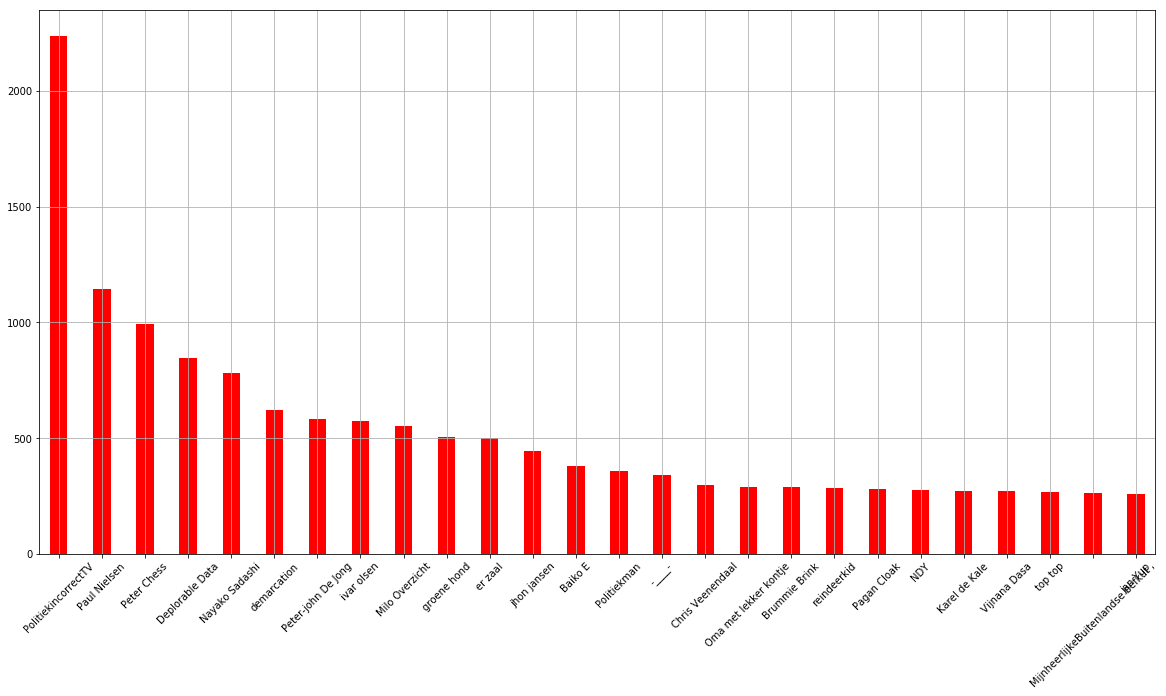

In [55]:
# Okay, we're set. Let's look at the prolific commenters first. 
# Who is commenting a lot in this network in general? 

topcommenters = nl_comment_sphere.author_display_name.value_counts()
topcommenters = topcommenters[0:26]

fig = plt.figure(figsize=(20,10)) # Create matplotlib figure

width = 0.4

topcommenters.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of comments')
ax.set_xlabel('name')
plt.xticks(rotation=45)

plt.show()

So there are some people that have commented more than 250 times in this dataset

Some observations:
* There are some channels in there that seem to actively debate with their viewers. I think it's interesting to have a look at the top two, but especially Paul Nielsen for he is affiliated with Forum voor Democratie.
* groene hond sounds familiar. I would'nt be suprised if this is the same person as 'botte hond', or 'zilte hond', a notorious social media figure.
* The names certainly don't point to real world identities. Yet.

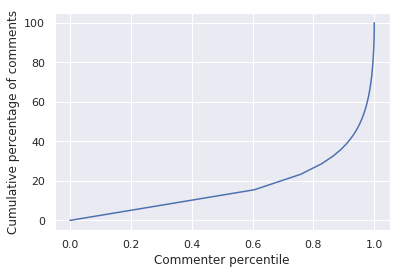

In [60]:
# Next up: a small group seems responsible for many comments. 
# Let's do an analysis of the GINI to see if that's true.

commenter_groups = nl_comment_sphere.groupby('author_channel_id') #we need these groups later.

num_comments = pd.DataFrame(commenter_groups.size().sort_values(ascending = True), columns = ['count'])
num_comments['Cumulative percentage of comments'] = 100*num_comments['count'].cumsum()/max(num_comments['count'].cumsum())
num_comments['Commenter percentile'] = num_comments.reset_index().index/max(num_comments.reset_index().index)

sns.lineplot(x=num_comments['Commenter percentile'],y=num_comments['Cumulative percentage of comments'])

del num_comments

Indeed, about 75 percent of the comments are placed by 20 percent of the commenters. And about 50 percent of the comments by about 5 percent of the commenters.

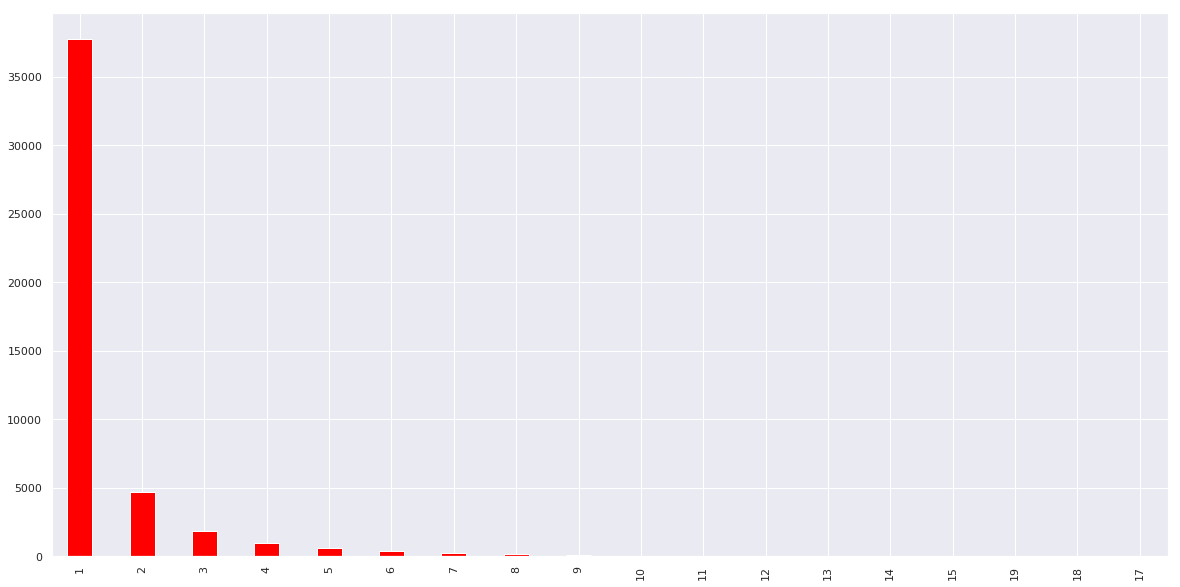

In [63]:
# Some are commenting a lot on their own channel (like Paul Nielsen). 
# Who is commenting all over the place?

prolific_commenters = commenter_groups['video_channel_title'].nunique().value_counts()

fig = plt.figure(figsize=(20,10)) # Create matplotlib figure

width = 0.4

prolific_commenters.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of commenters')
ax.set_xlabel('number of channels')

plt.show()

By far the most commenters (35.000 plus) only comment on 1 dchannel. About 5000 comment on two channels. But we're not interested in these commenters, we want to dive into the tail of this graph, so let's start looking for commenters who are commenting on 5 or more channels.

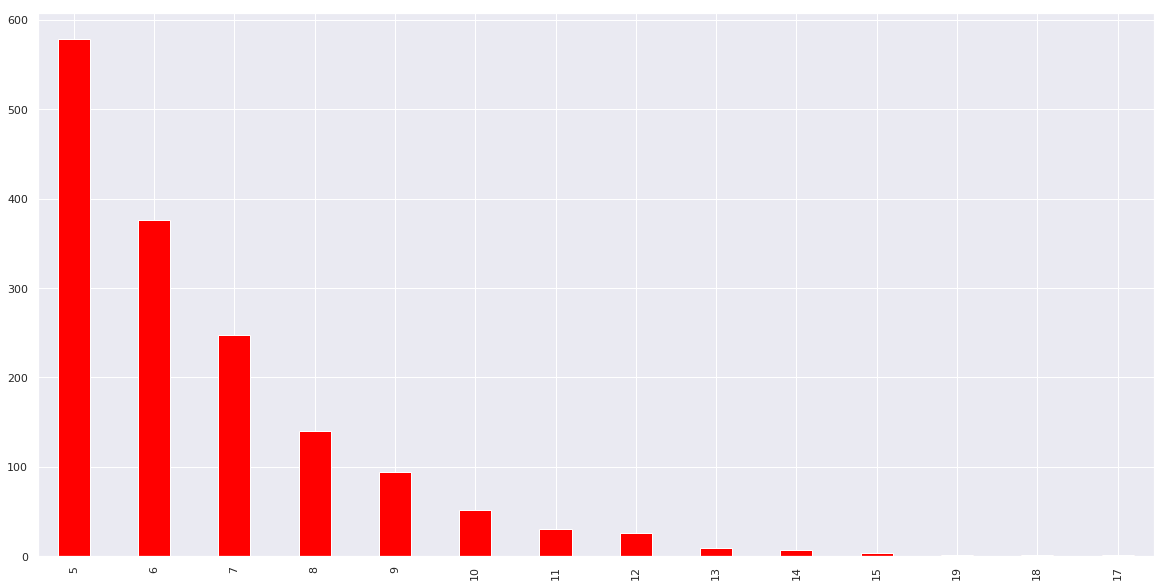

In [64]:
prolific_commenters = prolific_commenters[4:]

fig = plt.figure(figsize=(20,10)) # Create matplotlib figure

width = 0.4

prolific_commenters.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of commenters')
ax.set_xlabel('number of channels')

plt.show()

Let's get the names of the most profilic commenters.

In [69]:
# Fill in a threshold of how many different channels someone has been commenting.

threshold = 10

prolific_commenters = nl_comment_sphere.groupby('author_channel_id') \
                    .filter(lambda x: ((x.video_channel_title.nunique() >= threshold) ))

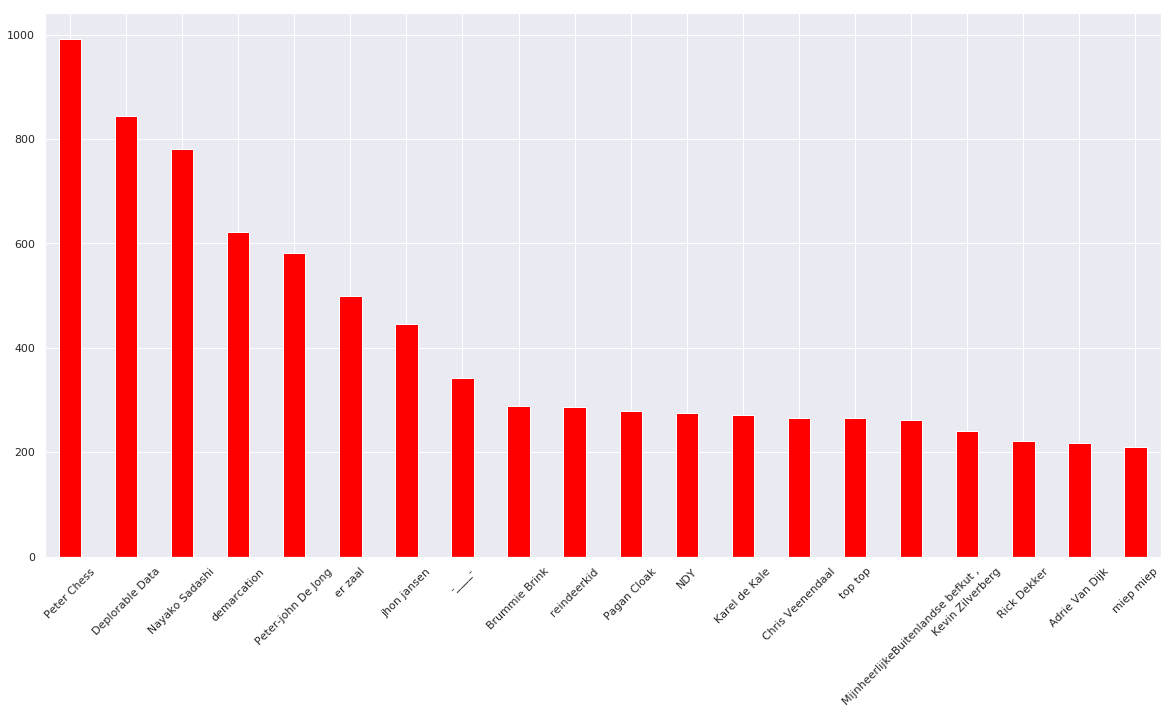

In [71]:
# Plot the most prolific commenters with the number of comments. 

prolific_commenters_to_plot = prolific_commenters.author_display_name.value_counts()
prolific_commenters_to_plot = prolific_commenters_to_plot[0:20]

fig = plt.figure(figsize=(20,10)) # Create matplotlib figure

width = 0.4

prolific_commenters_to_plot.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of commenters')
ax.set_xlabel('number of channels')
plt.xticks(rotation=45)

plt.show()

There is a large overlap between the people who comment a lot and people who comment all over the place. The channels (like politiekincorrecttv and paul nielsen) are gone. If you want to look at the radical core of the Dutch YouTube information network, here it is. Let's explore some of them. 

#### Zooming in on a couple of persons of interest in the Dutch network

In [127]:
# Let's start with Peter Chess (would his real name be Peter Schaak?)

peter = nl_comment_sphere[nl_comment_sphere['author_display_name'] == 'Peter Chess']

#### Dutch commenters on international channels

I'm interested in exploring how these (mostly) Dutch users are represented in the larger international far right channel network. So I'll make a list of unique id's and run it through the larger corpus.

In [129]:
users_to_check = nl_comment_sphere.author_channel_id.unique().tolist()

In [130]:

columns = ['video_id', 
           'comment_id', 
           'comment_id2', 
           'author_display_name',
           'author_image',
           'author_channel_url',
           'author_channel_id',
           'comment_text',
           'number_of_replies',
           'comment_date'
          ]


iter_csv = pd.read_csv(path_i + 'comments_right.csv', iterator=True, chunksize=100000, names=columns)
nl_int_comment_sphere = pd.concat([chunk[chunk['author_channel_id'].isin(users_to_check)] for chunk in iter_csv])


In [131]:
# Merge comments with video and channel data

videos_all = pd.read_csv(path_i + 'videos_right.csv', low_memory=False)

nl_int_comment_sphere = pd.merge(nl_int_comment_sphere, videos_all, on='video_id', how='left')

In [132]:
# How many comments do we have in this new dataset?

len(nl_int_comment_sphere)

480092

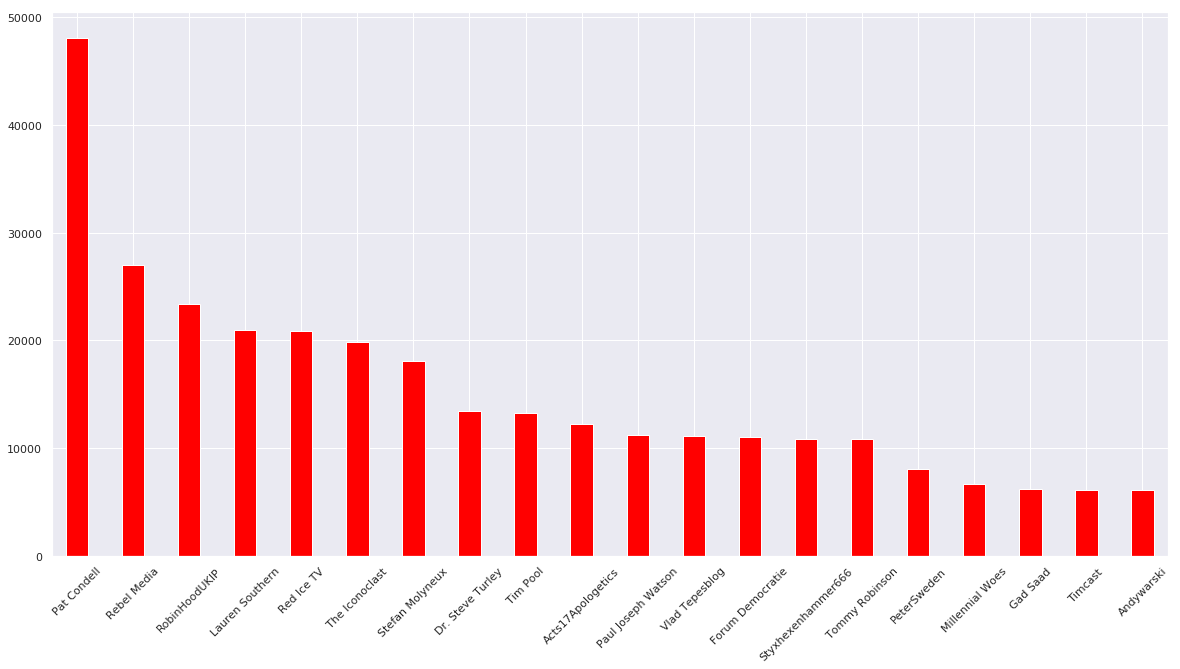

In [134]:
# So this is where people who comment on Dutch channels are commenting in our far right network

popular_channels_for_dutch = nl_int_comment_sphere.video_channel_title.value_counts()
popular_channels_for_dutch = popular_channels_for_dutch[0:20]

fig = plt.figure(figsize=(20,10)) # Create matplotlib figure

width = 0.4

popular_channels_for_dutch.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of comments')
ax.set_xlabel('channels')
plt.xticks(rotation=45)

plt.show()

Some observations:
* Pat Condell is really popular with Dutch commenters.
* Rebel Media is interesting. I didn't know it was that popular.
* Millennial Woes scores pretty high as well.

Let's gather some more stats on the group.

In [136]:
commenter_groups = nl_int_comment_sphere.groupby('author_channel_id')

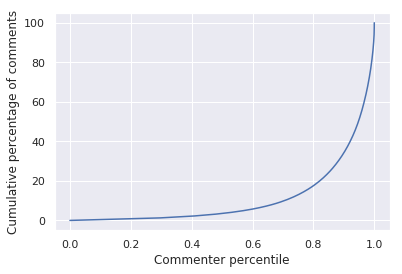

In [137]:
# Let's do another gini analysis (the results are probably the same)

num_comments = pd.DataFrame(commenter_groups.size().sort_values(ascending = True), columns = ['count'])
num_comments['Cumulative percentage of comments'] = 100*num_comments['count'].cumsum()/max(num_comments['count'].cumsum())
num_comments['Commenter percentile'] = num_comments.reset_index().index/max(num_comments.reset_index().index)

sns.lineplot(x=num_comments['Commenter percentile'],y=num_comments['Cumulative percentage of comments'])

del num_comments

This graph shows that the international Dutch comment sphere is a little bit more elitist than the Dutch one, which shouldn't suprise us. 

Take a look at the number of commenters commenting on n channels.

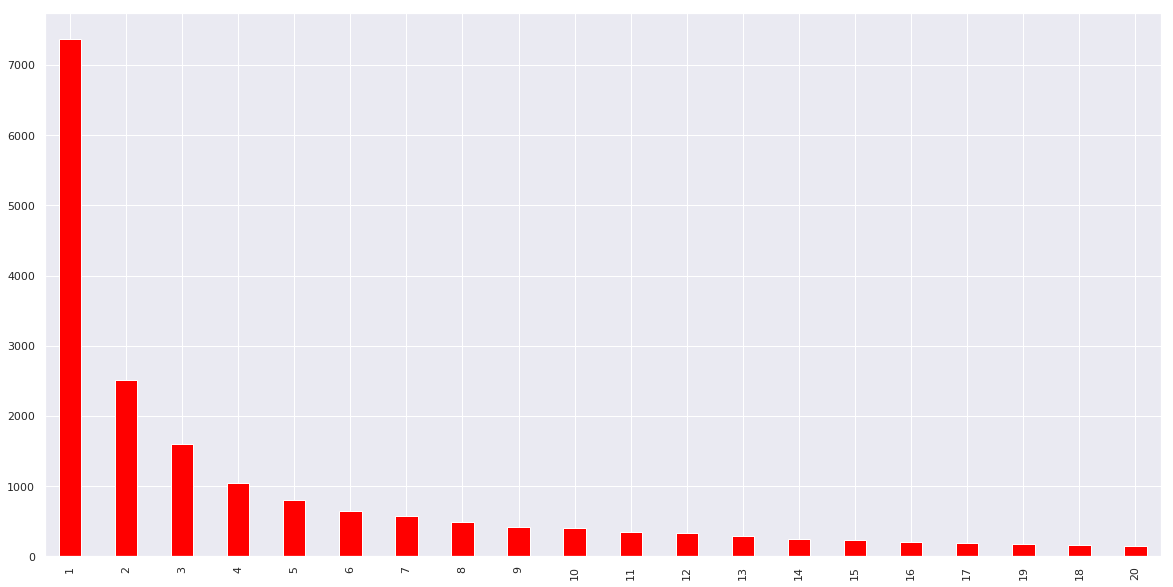

In [140]:
prolific_commenters = commenter_groups['video_channel_title'].nunique().value_counts()
prolific_commenters = prolific_commenters[0:20]

fig = plt.figure(figsize=(20,10)) 

width = 0.4

prolific_commenters.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of commenters')
ax.set_xlabel('number of channels')

plt.show()

It seems a little bit more evenly distributed. Let's look at the tail of the graph, so the really prolific commenters.

[]

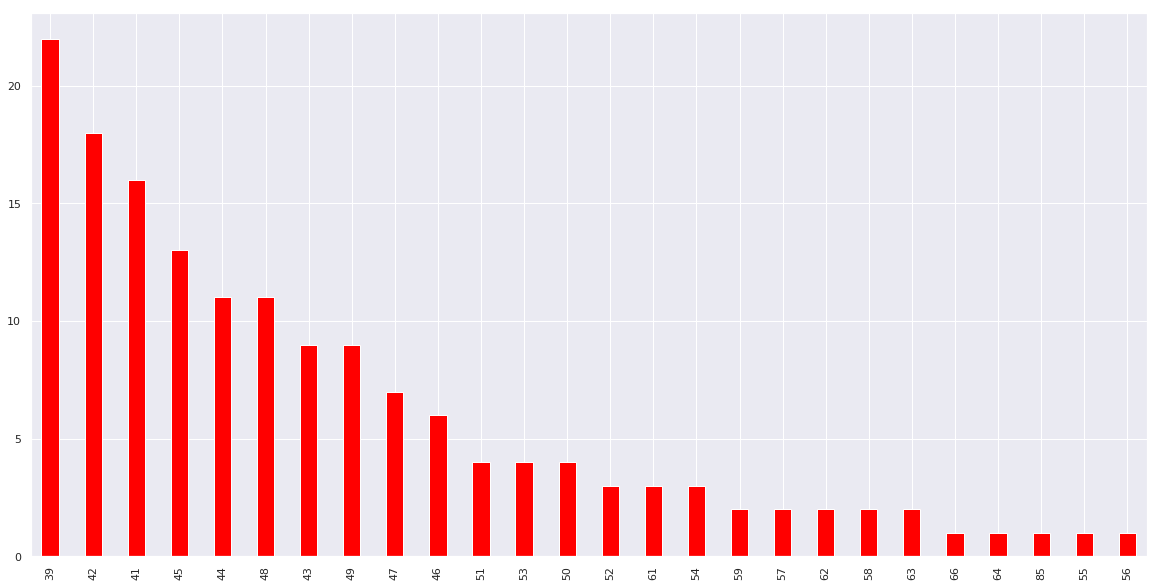

In [144]:
prolific_commenters = commenter_groups['video_channel_title'].nunique().value_counts()
prolific_commenters = prolific_commenters[40:]

fig = plt.figure(figsize=(20,10)) 

width = 0.4

prolific_commenters.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of commenters')
ax.set_xlabel('number of channels')

plt.plot()

These are the people that are really, really prolific, commenting on 39 channels and more. Who are these people?

In [146]:
# Fill in a threshold of how many different channels someone has been commenting.

threshold = 40

prolific_commenters = nl_int_comment_sphere.groupby('author_channel_id') \
                    .filter(lambda x: ((x.video_channel_title.nunique() >= threshold) ))

In [148]:
prolific_commenters.author_display_name.value_counts()

Ian Paling                                   1608
Michael B                                    1381
doczg88                                      1021
Hope For the Planet                           959
A. PINOCHET                                   881
John Forbes                                   838
PissedFechtmeister                            809
Roman Darius                                  803
identity Europa                               742
Zed Dez                                       689
Pinochet Pilot #666                           655
Old Earthling Carl                            614
Max von Musterberg                            606
tsfcancerman                                  581
Mooooohamsalad                                571
Mike Ryan                                     566
Canadian Girl                                 558
Robber Baroness                               515
Bon Chance                                    513
Thomas McEwen                                 504


Some observations:

1. These are not only Dutch people. No problem. This is something we know, because foreign people can comment on Dutch channels as well. 
2. There are some interesting people I think. For starters: carolienleiden. Might that be Caroline Dauphine from JFvD? Who knows. Identity Europa is a Dutch guy I think, connected to ID Verzet. There are a couple of Dutch guys calling themselves Pinochet I think, closely related to Erkenbrand and /polder/

In [149]:
caroline = nl_int_comment_sphere[nl_int_comment_sphere['author_display_name'] == 'carolineleiden']

In [151]:
caroline.video_channel_title.value_counts()

Rebel Media                 15
Stefan Molyneux             13
Apostate Prophet             9
Vlad Tepesblog               9
Lauren Southern              9
Acts17Apologetics            8
Red Ice TV                   8
RockingMrE                   7
Dr. Steve Turley             6
The Iconoclast               6
Timcast                      6
Sargon of Akkad              6
The Patriotic Report         5
Black Pilled                 5
Tommy Robinson               5
Tim Pool                     4
Paul Joseph Watson           4
The Daily Wire               3
OpenMind                     3
Refugee crisis in Europe     3
Pat Condell                  3
Styxhexenhammer666           3
PeterSweden                  3
Gad Saad                     2
The Swan of Tuonela          2
Sargon of Akkad Live         2
Lauren Chen                  2
On The Offensive             2
crosseyedone                 2
RobinHoodUKIP                2
Brittany Pettibone           2
LBC                          1
IRISHINF

Caroline is deep into the alt-right. Let's download her data for further manual inspection.

In [152]:
caroline.to_csv(path + 'nl_caroline.csv')

In [153]:
identity_europa = nl_int_comment_sphere[nl_int_comment_sphere['author_display_name'] == 'identity Europa']

In [154]:
identity_europa.video_channel_title.value_counts()

Millennial Woes                     99
Red Ice TV                          79
Dr. Steve Turley                    39
RockingMrE                          35
Stefan Molyneux                     33
The Golden One                      32
Tim Pool                            29
Vlad Tepesblog                      24
Styxhexenhammer666                  24
The Swan of Tuonela                 23
Lauren Southern                     21
Count Dankula                       18
RobinHoodUKIP                       14
Coach Red Pill                      13
Lauren Chen                         12
Mark Collett                        12
Timcast                             12
You Kipper                          12
Julie Borowski                      10
Mister Metokur                      10
AaronClarey                          9
Gaelic Neoreactionary                9
On The Offensive                     9
Alfred Alfer                         9
The Iconoclast                       9
Sargon of Akkad Live     

In [155]:
PissedFechtmeister = nl_int_comment_sphere[nl_int_comment_sphere['author_display_name'] == 'PissedFechtmeister']

In [156]:
PissedFechtmeister.video_channel_title.value_counts()

PJ Media                             178
Julie Borowski                        82
Millennial Woes                       69
Bill Whittle                          52
ramzpaul                              40
Red Ice TV                            40
Pat Condell                           25
Apollonian Germ                       20
Brittany Pettibone                    19
Lauren Southern                       18
The Golden One                        18
NPI / Radix                           17
Ayla Stewart Wife With A Purpose      16
ReasonTV                              15
Gaelic Neoreactionary                 14
RockingMrE                            14
Black Pilled                          12
Libertarian Realist                   11
On The Offensive                      10
American Renaissance                   9
Coach Red Pill                         6
The Great Order                        6
Paul Joseph Watson                     5
AaronClarey                            5
Fritz Imperial  

In [157]:
ianpaling = nl_int_comment_sphere[nl_int_comment_sphere['author_display_name'] == 'Ian Paling']

In [158]:
ianpaling.video_channel_title.value_counts()

Gad Saad                          226
RockingMrE                        134
The Iconoclast                    123
Millennial Woes                   109
Rebel Media                        80
Stefan Molyneux                    76
Lauren Southern                    61
Mister Metokur                     56
Pat Condell                        51
Sargon of Akkad Live               42
Brittany Pettibone                 39
Sargon of Akkad                    38
Tim Pool                           38
The Swan of Tuonela                38
RobinHoodUKIP                      34
Lauren Chen                        34
Janet Bloomfield                   32
On The Offensive                   31
Red Ice TV                         29
Acts17Apologetics                  26
The Daily Wire                     26
Count Dankula                      24
PJ Media                           22
Tommy Robinson                     20
ReasonTV                           19
Timcast                            17
Styxhexenham

In [159]:
max_von_musterberg = nl_int_comment_sphere[nl_int_comment_sphere['author_display_name'] == 'Max von Musterberg']

In [160]:
max_von_musterberg.video_channel_title.value_counts()

COMPACTTV                             127
Malarich                              112
Political Channel                      47
Emperor Caligula                       38
Nicolaus Fest                          30
Laut Gedacht                           28
Der Volkslehrer                        26
Martin Sellner GI                      26
Oesterreichzuerst                      15
Junge Freiheit Verlag                  14
Antipaganda                            14
Identitäre Bewegung Deutschland        12
Lutz Bachmann                          10
Operation Fregin                       10
FREIE-HEIMAT                            9
BayernDieFreiheit                       7
Vlad Tepesblog                          6
You enter Germany                       6
Hagens HirnTicker                       6
Defend Europe                           6
kanal schnellroda                       5
Esterreicherr                           4
Pat Condell                             3
Identitäre Bewegung Österreich    

In [161]:
nico_bester = nl_int_comment_sphere[nl_int_comment_sphere['author_display_name'] == 'Nico Bester']

In [162]:
nico_bester.video_channel_title.value_counts()

Rebel Media                           23
The Daily Wire                        17
Pat Condell                           15
The Patriotic Report                  13
Stefan Molyneux                        9
LBC                                    7
Dr. Steve Turley                       6
Mark Steyn                             5
Tommy Robinson                         5
Gad Saad                               4
Brittany Pettibone                     4
Lauren Southern                        3
crosseyedone                           2
Coach Red Pill                         2
OpenMind                               2
Mark Collett                           2
Blazing Catfur                         2
PeterSweden                            2
Vlad Tepesblog                         2
Schild & Vrienden                      2
Identitäre Bewegung Sachsen-Anhalt     2
Palaestra Media                        2
RobinHoodUKIP                          2
The Iconoclast                         2
Paul Weston     

TOT 2.3 IS HET NOG WAT PROBEERSELS EN TROEP. DUS SLA DIT EVEN OVER.

In [ ]:
# let's zoom in on some channels

channel = 'Millennial Woes' #enter the channel name

comments_of_interest = int_vid_comments[int_vid_comments['video_channel_title'] == channel]

comments_of_interest

My impression is that the data are skewed because of Voice of Europe. We can collect more specific data if we want. Let's select one or more Dutch channels first.

#### Commenters of specific Dutch channels

In [ ]:
#first merge the comments with the videos

nl_comment_sphere = pd.merge(comments, videos, on='video_id', how='left')

In [ ]:
#a reminder of the available channels: TODO: Erkenbrand seems to be missing. I need to investigate

nl_comment_sphere.video_channel_title.value_counts()

In [ ]:
dutch_chan = 'Forum Democratie' #select dutch channels

commenters_of_interest = nl_comment_sphere[nl_comment_sphere['video_channel_title'] == dutch_chan]
commenters_of_interest = commenters_of_interest.author_channel_id.tolist()

In [ ]:
columns = ['video_id', 
           'comment_id', 
           'comment_id2', 
           'author_display_name',
           'author_image',
           'author_channel_url',
           'author_channel_id',
           'comment_text',
           'number_of_replies',
           'comment_date'
          ]


iter_csv = pd.read_csv(path_i + 'comments_right.csv', iterator=True, chunksize=100000, names=columns)
nl_users_int = pd.concat([chunk[chunk['author_channel_id'].isin(commenters_of_interest)] for chunk in iter_csv])


In [ ]:
len(nl_users_int)

In [ ]:
videos_all = pd.read_csv(path_i + 'videos_right.csv', low_memory=False)

In [ ]:
int_vid_comments = pd.merge(nl_users_int, videos_all, on='video_id', how='left')

In [ ]:
#dus dit is waar de mensen die onder FvD reageren nog meer reageren (in onze dataset)

int_vid_comments.video_channel_title.value_counts()

In [ ]:
int_vid_comments.to_csv(path + 'commenters_fvd.csv')

#### Start looking for interesting commenters

These commenters are:
1. Profilic
2. Post on many channels. We can use [code from Max Boiten](https://github.com/CorrespondentData/YouTubeExtremism/blob/master/comment_analysis/Comment_descriptives.ipynb)
3. Post extreme content
4. Are somehow influential (what metrics can we use for that?)

In [ ]:
videos.to_csv(path + 'complete_videos.csv')
comments.to_csv(path + 'complete_comments.csv')
channels.to_csv(path + 'complete_channels.csv')

videos_file = path + 'complete_videos.csv'
comments_file = path + 'complete_comments.csv'
channel_file = path + 'complete_channels.csv'

In [ ]:
#posting on many channels.

import comment_lib
import seaborn as sns; sns.set()
import csv

with open(comments_file, 'r', encoding = 'utf8') as f:
    data = comment_lib.read_comments(f)

data = comment_lib.add_video_metadata(data, videos_file, channel_file)

In [ ]:
#number of commenters

commenter_groups = data.groupby('author_channel_id')

In [ ]:
num_comments = pd.DataFrame(commenter_groups.size().sort_values(ascending = True), columns = ['count'])
num_comments['Cumulative percentage of comments'] = 100*num_comments['count'].cumsum()/max(num_comments['count'].cumsum())
num_comments['Commenter percentile'] = num_comments.reset_index().index/max(num_comments.reset_index().index)

sns.lineplot(x=num_comments['Commenter percentile'],y=num_comments['Cumulative percentage of comments'])

#print('20% van de commenters plaatst 70% van de comments en de top-10% plaatst 60% van de comments')
del num_comments

In [ ]:
#number of channels per commenter

commenter_groups['channel_title'].nunique().value_counts()


In [ ]:
prolific = data.groupby('author_channel_id').filter(lambda x: ((x.channel_title.nunique() >= 10) ))

In [ ]:
#these are the commenters that have commented on ten or more channels in our dataset (only dutch channels)

prolific.author_display_name.value_counts()

In [ ]:
peter = prolific[prolific['author_display_name'] == 'Peter Chess']

In [ ]:
peter.channel_title.unique()

In [ ]:
#so how about dutch commenters in the international far right network? TODO: have a good look at 
#the data, because the results seem off.

len(int_vid_comments)

In [ ]:
commenter_groups = int_vid_comments.groupby('author_channel_id')

In [ ]:
num_comments = pd.DataFrame(commenter_groups.size().sort_values(ascending = True), columns = ['count'])
num_comments['Cumulative percentage of comments'] = 100*num_comments['count'].cumsum()/max(num_comments['count'].cumsum())
num_comments['Commenter percentile'] = num_comments.reset_index().index/max(num_comments.reset_index().index)

sns.lineplot(x=num_comments['Commenter percentile'],y=num_comments['Cumulative percentage of comments'])

#print('20% van de commenters plaatst 70% van de comments en de top-10% plaatst 60% van de comments')
del num_comments

In [ ]:
int_vid_comments.columns

In [ ]:
prolific = int_vid_comments.groupby('author_channel_id').filter(lambda x: ((x.video_channel_title.nunique() >= 10) ))

In [ ]:
prolific.author_display_name.unique().tolist()

In [ ]:
# merge comments with videos

comments = pd.merge(comments, videos, on='video_id', how='left')

In [ ]:
forum = comments[comments['video_channel_title'].isin(['Forum Democratie',
                                                       'Leukste YouTubeFragmenten',
                                                       'Paul Nielsen',
                                                       'Leukste YouTube fragmenten',
                                                       'Res cogitans',
                                                       'Laurens',
                                                       'LavendelTV',
                                                       'Kartel Schaar',
                                                       'Jongeren FVD'                                 
                                                       ])]

In [ ]:
#prepare comments for graph, method 1

comments_for_graph = comments[['author_display_name', 'video_channel_title', 'comment_time']]

In [ ]:
comments_for_graph = comments_for_graph.rename(columns={'author_display_name': 'Source', 
                                                        'video_channel_title': 'Target',
                                                        'comment_time': 'Start'
                                                       })

In [ ]:
comments_for_graph['Type'] = 'directed'
comments_for_graph['End'] = comments_for_graph['Start']

In [ ]:
comments_for_graph.to_csv(path + 'comments_graph.csv', index=None)

In [ ]:
comments.columns

Edges:
1. Source: author_display_name
2. Target: video_title
3. Type: directed
4. Start: comment_time
5. End: comment_time


Nodes:
1. Targets: video_channel_title, video_view_count, video_category_id, video_likes_count, video_tags


In [ ]:
comments_for_graph = comments[['author_display_name', 
                               'video_title', 
                               'comment_time', 
                               'video_channel_title',
                               'video_view_count',
                               'video_category_id',
                               'video_likes_count',
                               'video_tags']]

In [ ]:
comments_for_graph = comments_for_graph.rename(columns={'author_display_name': 'Source',
                                                        'video_title': 'VideoTitle',
                                                        'comment_time': 'Start',
                                                        'video_channel_title': 'Target',
                                                        'video_view_count': 'ViewCount',
                                                        'video_category_id': 'Categories',
                                                        'video_tags': 'Tags'})

In [ ]:
comments_for_graph['Type'] = 'directed'
comments_for_graph['End'] = comments_for_graph['Start']

In [ ]:
G = nx.from_pandas_edgelist(comments_for_graph, source='Source', target='Target', edge_attr=['Type', 'Start', 'End'])


In [ ]:

nodes1 = comments_for_graph[['Source', 'Start']]
nodes1 = nodes1.rename(columns={'Source':'Id'})

In [ ]:
nodes2 = comments_for_graph[['Target', 'VideoTitle', 'ViewCount', 'Categories', 'Tags']]
nodes2 = nodes2.rename(columns={'Target':'Id'})

In [ ]:
frames = [nodes1, nodes2]
nodes = pd.concat(frames, sort=True)

In [ ]:
nodes.head()

In [ ]:
nodes['NodeType'] = nodes['VideoTitle'].where(nodes['VideoTitle'].isnull(), 'video')

In [ ]:
nodes['NodeType'] = nodes.NodeType.fillna(value='commenter')

In [ ]:
comments_for_graph.to_csv(path + 'comments_edges.csv', index=None)

In [ ]:
len(comments_for_graph)

In [ ]:
new_nodes = nodes[['Id', 'VideoTitle', 'ViewCount', 'Tags', 'NodeType']]

In [ ]:
new_nodes = new_nodes.drop_duplicates()

In [ ]:
len(new_nodes)

In [ ]:
new_nodes.to_csv(path + 'comment_nodes.csv', index=False)

### Question #3: Comparisson

Make some comparissons with other information networks, starting with political parties.

In [164]:
# Load the data

channels_control = pd.read_csv(path + 'channels_nl_controlgroup_politiek.csv')
videos_control = pd.read_csv(path + 'videos_nl_controlgroup_politiek.csv')

In [168]:
# Get channel and video data from PVV and FvD

channel1 = 'Forum Democratie' #fill in the channels you want to compare
channel2 = 'PVVpers'

pvvfvd_vids = videos.loc[(videos['video_channel_title'] == channel1) | \
                      (videos['video_channel_title'] == channel2)
                     ]

In [169]:
pvvfvd_channels = channels.loc[(channels['channel_title'] == channel1) | \
                      (channels['channel_title'] == channel2)
                     ]

In [171]:
compare_channels = channels_control.append(pvvfvd_channels)

In [173]:
compare_vids = videos_control.append(pvvfvd_vids, sort=True)

In [179]:
compare_vids['video_upload_year'] = pd.DatetimeIndex(compare_vids['video_published']).year

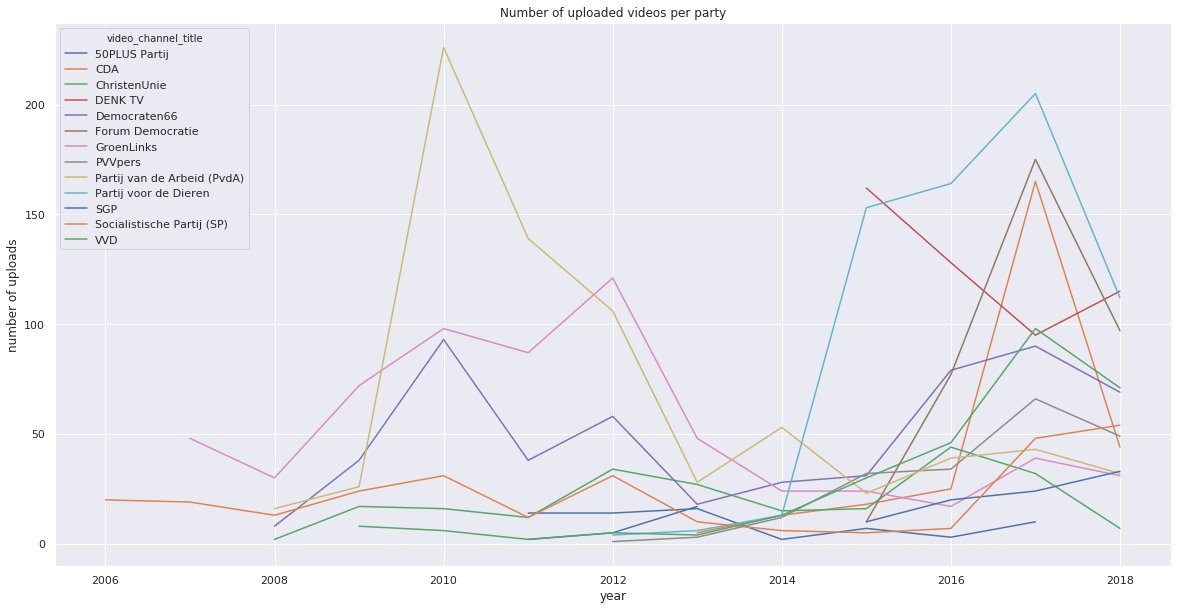

In [189]:
# Time to plot some stuff

ax = compare_vids.groupby(['video_upload_year','video_channel_title'])['video_channel_title'] \
        .count().unstack(1).plot.line(title="Number of uploaded videos per party", figsize=(20,10), grid=True)

ax.set_xlabel('year')
ax.set_ylabel('number of uploads')

plt.show()

# Show the number of uploads per year. I chose a line chart here, because the bar chart is really unclear.
# The data are of course discrete and not continuous. 

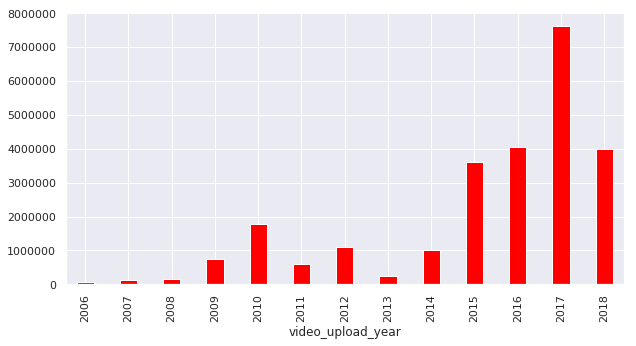

In [185]:
views_per_year = compare_vids.groupby(['video_upload_year'])['video_view_count'].agg('sum')

fig = plt.figure(figsize=(10,5)) # Create matplotlib figure

width = 0.4

views_per_year.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of videos published')
ax.set_xlabel('year')

plt.show()

# Show the number of views combined per year.

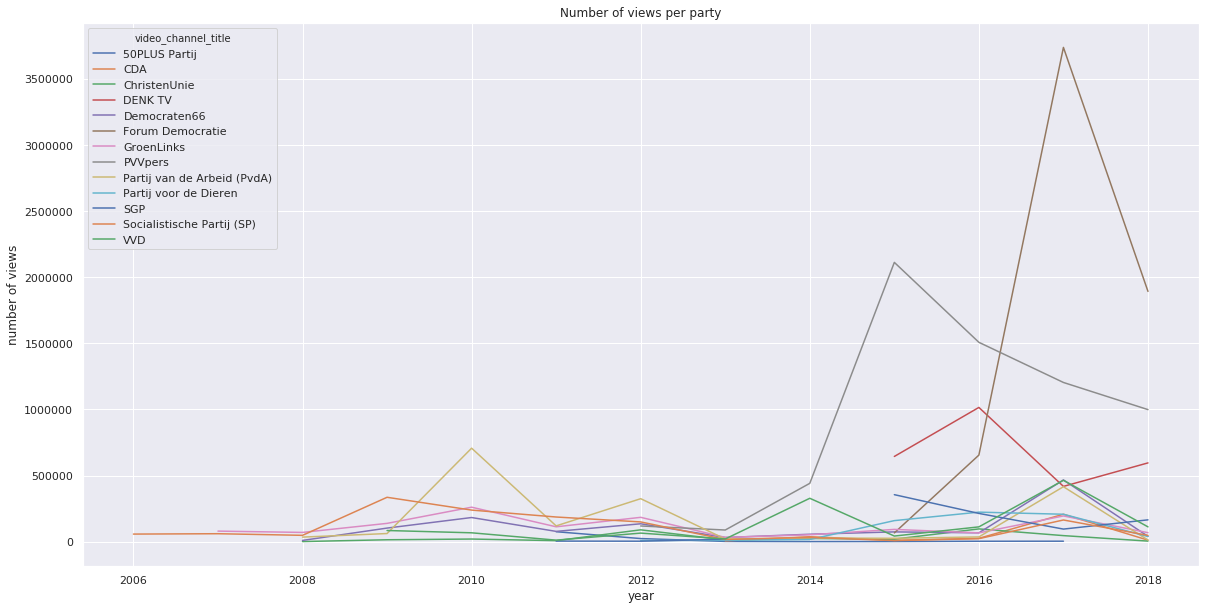

In [188]:
ax = compare_vids.groupby(['video_upload_year','video_channel_title'])['video_view_count'] \
        .agg('sum').unstack(1).plot.line(title="Number of views per party", figsize=(20,10), grid=True)

ax.set_xlabel('year')
ax.set_ylabel('number of views')

plt.show()

It's bit of a mess. Maybe it's better to make some decisions on what to show.